In [1]:
# Updaing changes in local modules

%load_ext autoreload
%autoreload 2

In [2]:
# Imports

## External Imports
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd

from afinn import Afinn
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import CountVectorizer

## Local Imports
from character_network_iterative import *

In [3]:
# Constants

BOOKS_FOLDER = '../books'
NOVEL_NAME = "Harry Potter 1"
NOVEL_FILE_NAME = "Harry Potter 1 - Sorcerer's Stone.txt"
SPACY_SM_MODEL = 'en_core_web_sm'
SPACY_LG_MODEL = 'en_core_web_lg'
LOCATION_LABELS = ["GPE", "LOC", "FAC"]
TOP_NAMES_COUNT = 10

In [4]:
# Data preparation

print("Loading the spacy model...")
nlp_names_func = spacy.load(SPACY_SM_MODEL)
nlp_location_func = spacy.load(SPACY_LG_MODEL, disable=['parser', 'tagger'])
nlp_funcs = {"Names": (nlp_names_func, None), "Locations": (nlp_location_func, LOCATION_LABELS)}

print("Reading novel: {} from: {}...".format(NOVEL_NAME, NOVEL_FILE_NAME))
novel = read_text(BOOKS_FOLDER, NOVEL_FILE_NAME)

print("Extracting the novel's sentences...")
sentence_list = sent_tokenize(novel)

print("{} sentences extracted.".format(len(sentence_list)))

Loading the spacy model...
Reading novel: Harry Potter 1 from: Harry Potter 1 - Sorcerer's Stone.txt...
Extracting the novel's sentences...
6394 sentences extracted.


In [5]:
# Text processing

print("Extracting affinity rate, characters and locations...")

#preliminary_name_list = iterative_NER(nlp_names_func, sentence_list)
preliminary_name_list, align_rate = process_sentences(nlp_funcs, sentence_list)

print("Done")

Extracting affinity rate, characters and locations...
Iterating the sentences:
Processed 0% of the sentences. (0 seconds passed)
Processed 5% of the sentences. (4 seconds passed)
Processed 10% of the sentences. (7 seconds passed)
Processed 15% of the sentences. (11 seconds passed)
Processed 20% of the sentences. (14 seconds passed)
Processed 25% of the sentences. (18 seconds passed)
Processed 30% of the sentences. (21 seconds passed)
Processed 35% of the sentences. (25 seconds passed)
Processed 40% of the sentences. (28 seconds passed)
Processed 45% of the sentences. (32 seconds passed)
Processed 50% of the sentences. (35 seconds passed)
Processed 55% of the sentences. (39 seconds passed)
Processed 60% of the sentences. (42 seconds passed)
Processed 65% of the sentences. (46 seconds passed)
Processed 70% of the sentences. (49 seconds passed)
Processed 75% of the sentences. (53 seconds passed)
Processed 80% of the sentences. (56 seconds passed)
Processed 85% of the sentences. (59 second

In [6]:
print("Getting top {} names and locations...".format(TOP_NAMES_COUNT))
name_frequency, name_list = top_names(preliminary_name_list["Names"], novel, 2*TOP_NAMES_COUNT)
place_frequency, place_list = top_names(preliminary_name_list["Locations"], novel, TOP_NAMES_COUNT)

# TODO: combine first and last names

print("Calculating the relations between the characters...")
cooccurrence_matrix, sentiment_matrix = calculate_matrix(name_list, sentence_list, align_rate)

print("Characters relation matrix calculated.")

Getting top 10 names and locations...
Calculating the relations between the characters...
Characters relation matrix calculated.


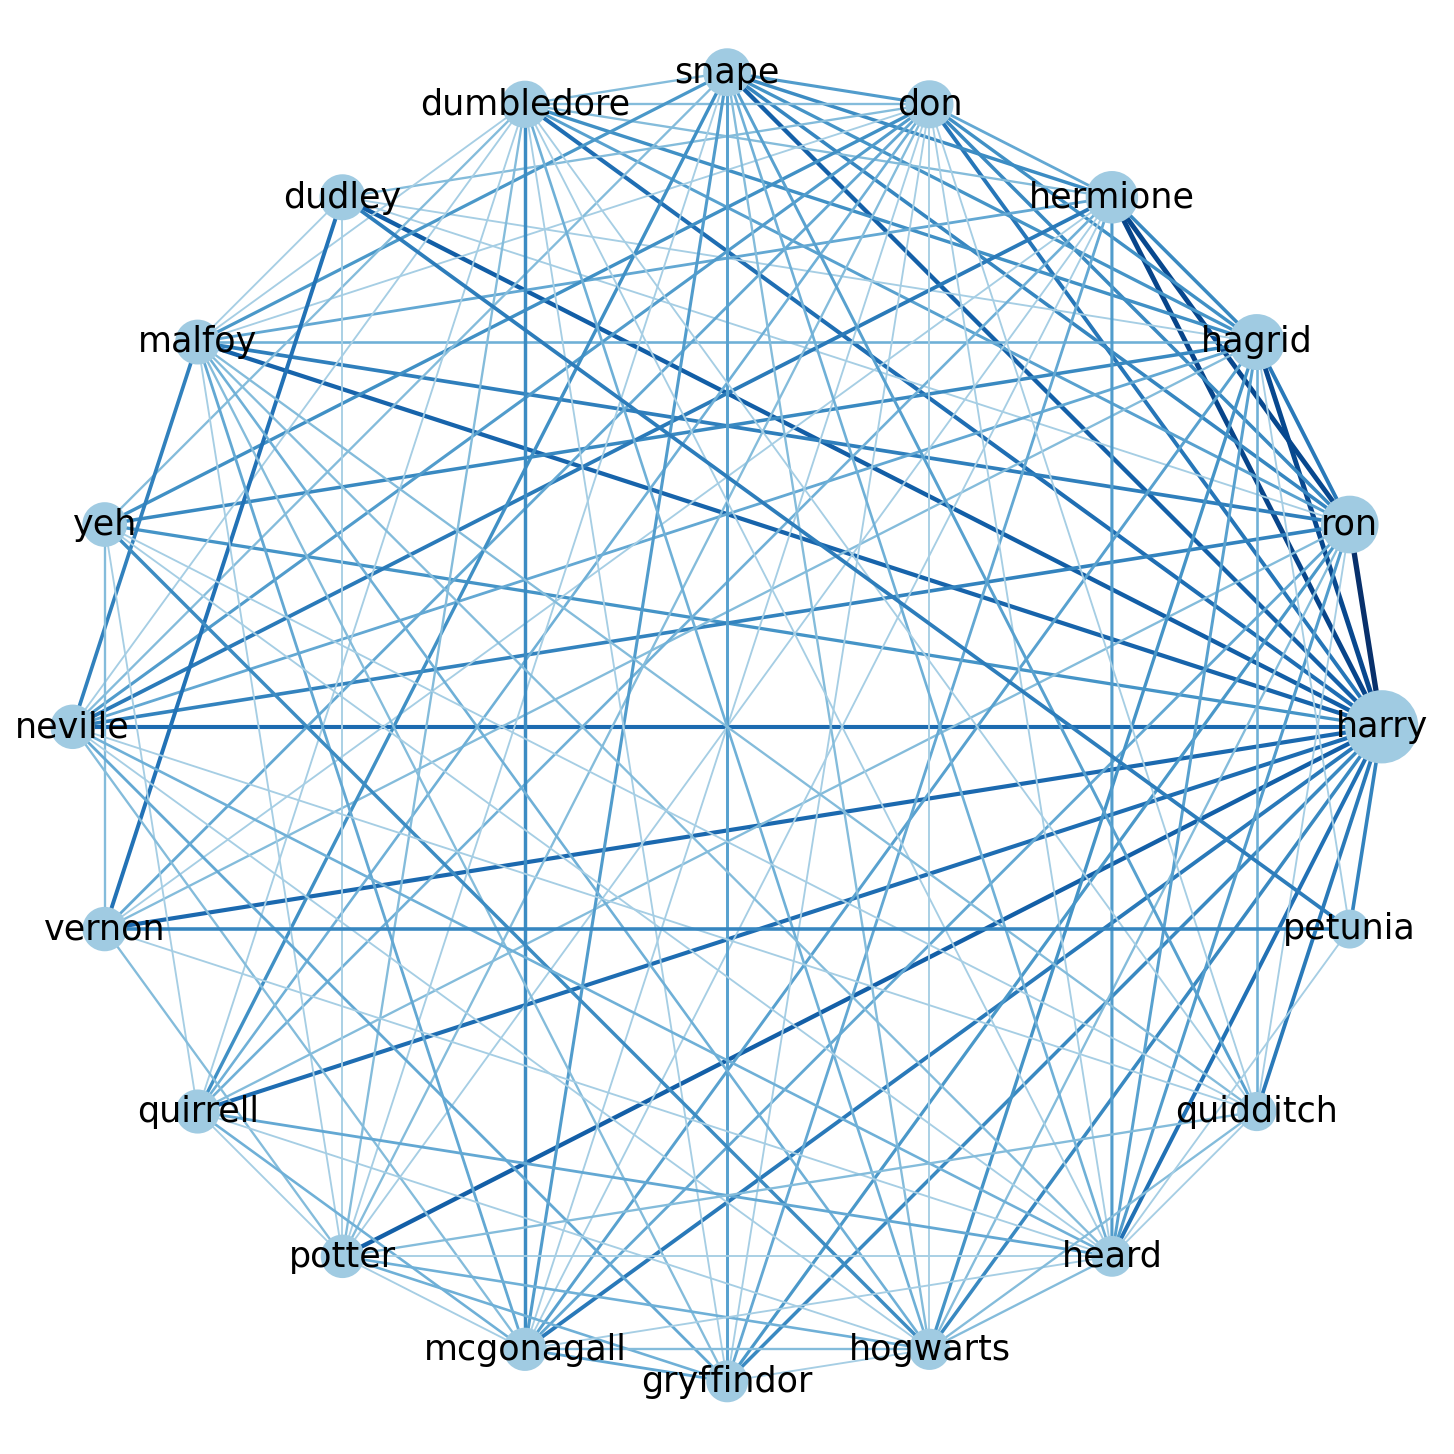

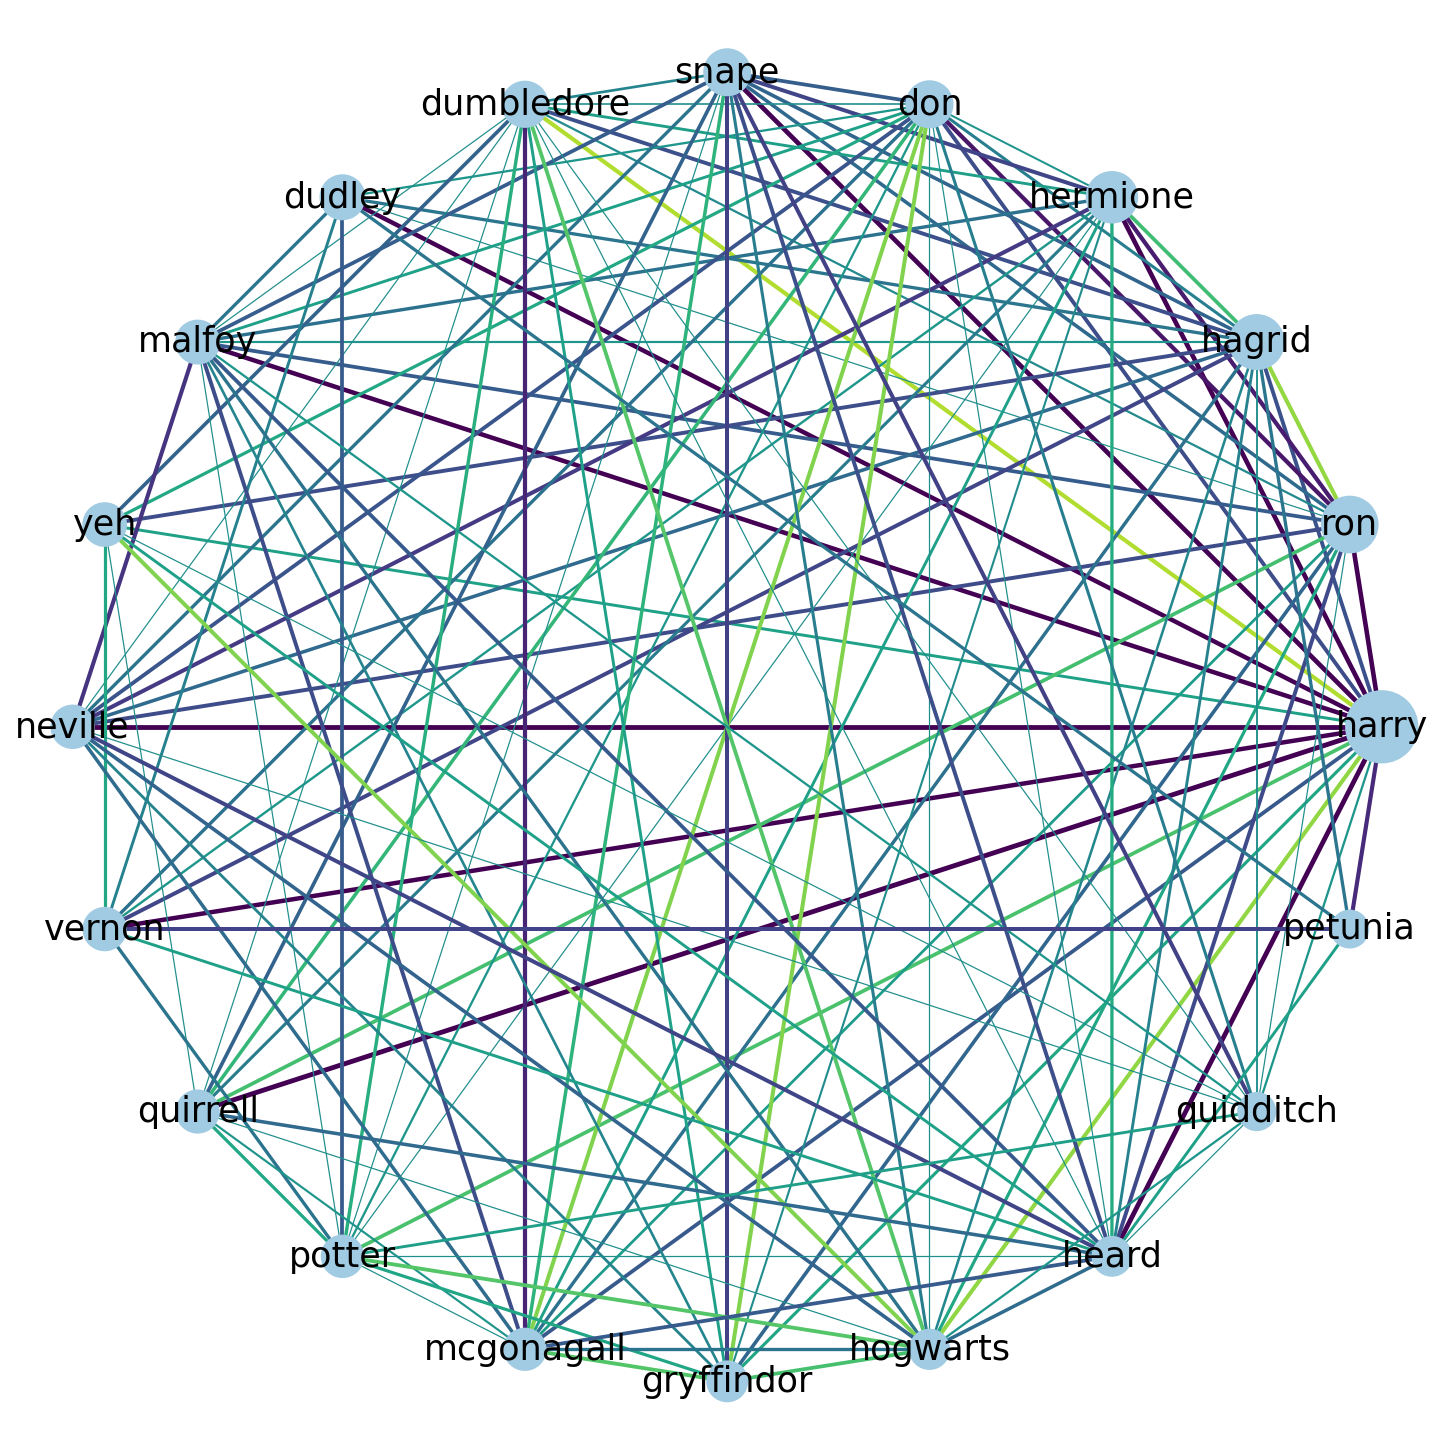

In [7]:
plot_graph(name_list, name_frequency, cooccurrence_matrix, NOVEL_NAME + ' co-occurrence graph', 'co-occurrence')
plot_graph(name_list, name_frequency, sentiment_matrix, NOVEL_NAME + ' sentiment graph', 'sentiment')

In [14]:
for name in name_list:
    if name in place_list:
        del place_frequency[place_list.index(name)]
        place_list.remove(name)        

combined_name_place_list = name_list + place_list
combined_name_place_freq_list = name_frequency + place_frequency
cooccurrence_matrix_combined, sentiment_matrix_combined = calculate_matrix(combined_name_place_list, sentence_list, align_rate)

[('firenze', 'harry', {'weight': 3.187417046275345, 'color': 4.553452923250493}), ('firenze', 'hagrid', {'weight': 1.868168113487936, 'color': 2.6688115906970515}), ('firenze', 'potter', {'weight': 1.868168113487936, 'color': 2.6688115906970515}), ('london', 'harry', {'weight': 2.6040689080056074, 'color': 3.7200984400080106}), ('london', 'dumbledore', {'weight': 1.868168113487936, 'color': 2.6688115906970515}), ('london', 'dudley', {'weight': 1.868168113487936, 'color': 2.6688115906970515}), ('london', 'yeh', {'weight': 1.868168113487936, 'color': 2.6688115906970515}), ('london', 'petunia', {'weight': 1.868168113487936, 'color': 2.6688115906970515}), ('flint', 'harry', {'weight': 2.9548289060523514, 'color': 4.221184151503359}), ('flint', 'gryffindor', {'weight': 2.8011929353623324, 'color': 4.001704193374761}), ('romania', 'ron', {'weight': 2.328673420071186, 'color': 3.326676314387409})]


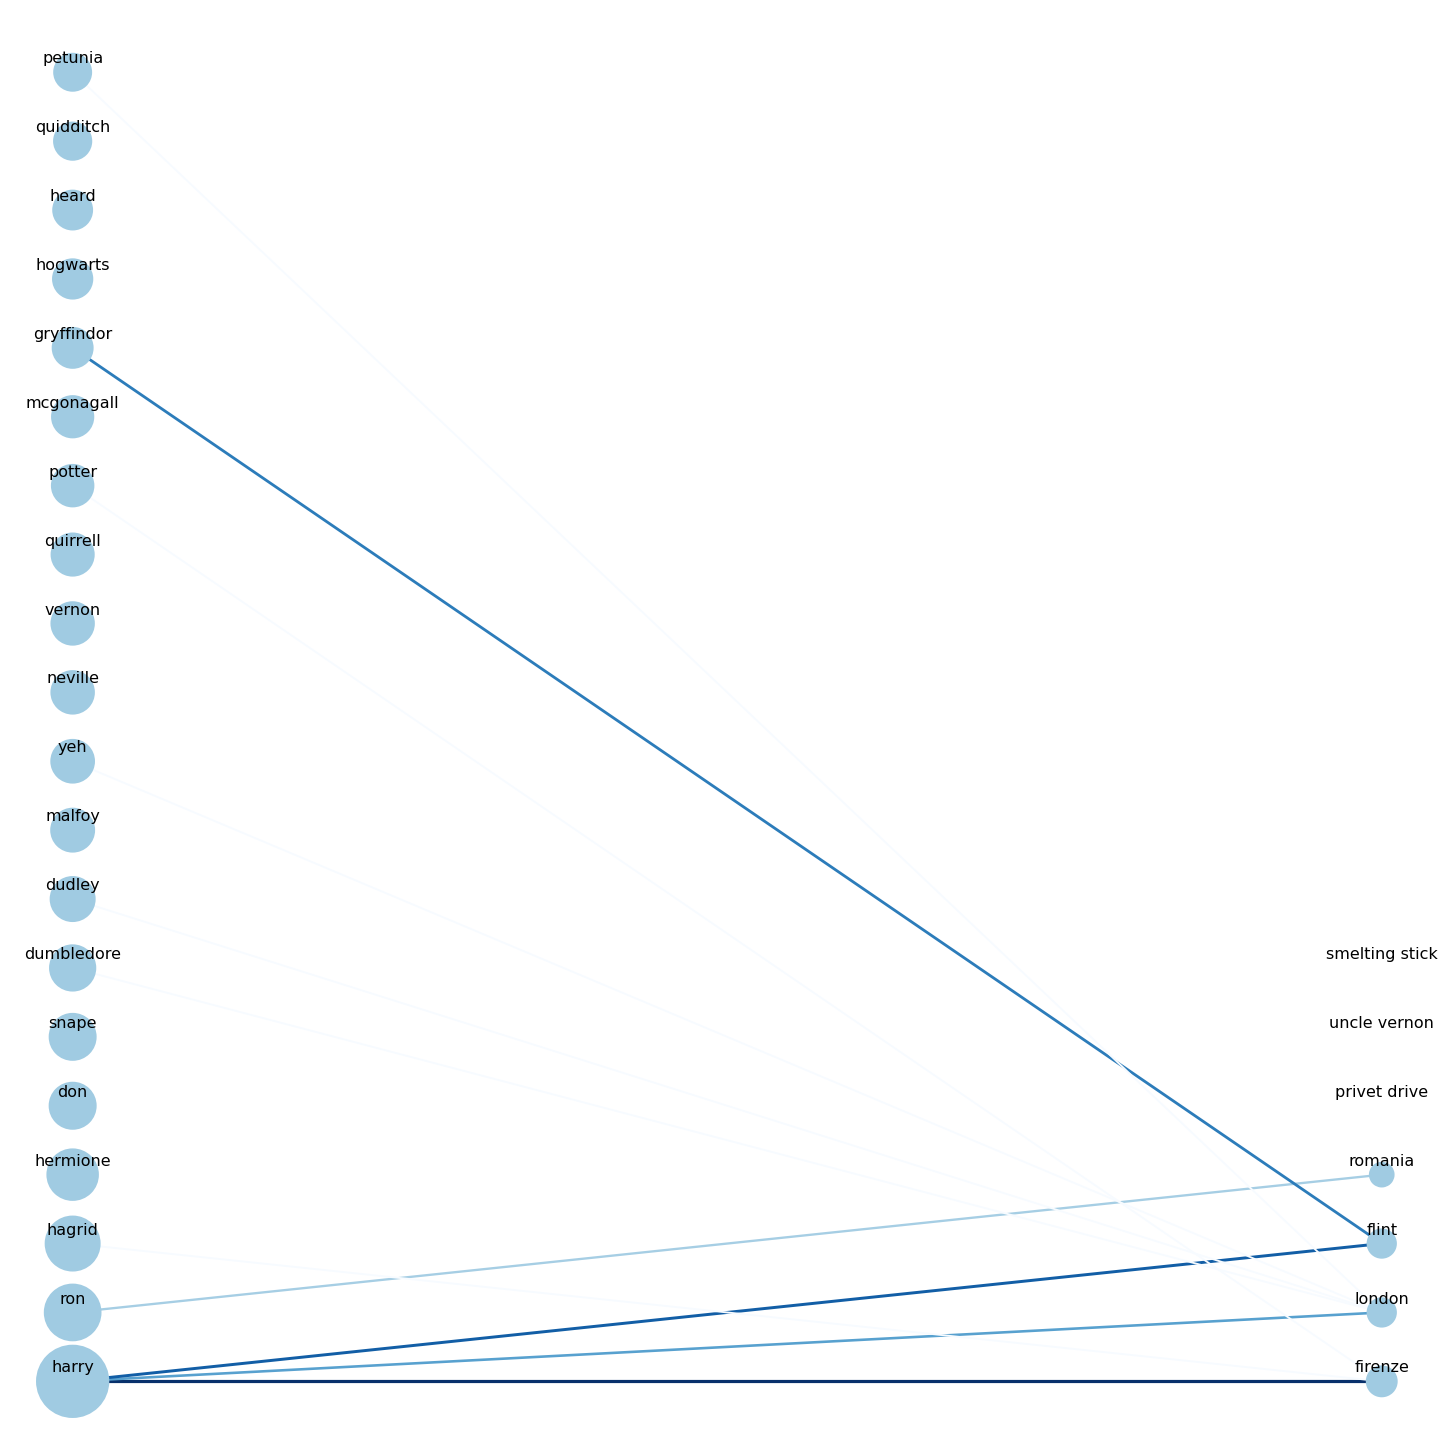

In [17]:
plot_graph_v3(name_list, name_frequency, place_list, place_frequency, cooccurrence_matrix_combined, NOVEL_NAME + ' co-occurrence graph', 'co-occurrence')

In [18]:
combined_name_place_list

['harry',
 'ron',
 'hagrid',
 'hermione',
 'don',
 'snape',
 'dumbledore',
 'dudley',
 'malfoy',
 'yeh',
 'neville',
 'vernon',
 'quirrell',
 'potter',
 'mcgonagall',
 'gryffindor',
 'hogwarts',
 'heard',
 'quidditch',
 'petunia',
 'firenze',
 'london',
 'flint',
 'romania',
 'privet drive',
 'uncle vernon',
 'smelting stick']